https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

DataSet: https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs?select=dataset

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [18]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/",target_size=(150,150),batch_size = 32,class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/",target_size=(150,150),batch_size =32,class_mode = 'binary')

Found 2998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
test_dataset.class_indices

{'cartoon': 0, 'real': 1}

In [20]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
# Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [21]:
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 20,
         epochs = 10,
         validation_data = test_dataset)

C:\Users\User\AppData\Local\Temp\ipykernel_17300\2967062941.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/10
20/20 [==============================] - 20s 951ms/step - loss: 0.7129 - accuracy: 0.5813 - val_loss: 0.4950 - val_accuracy: 0.7980
Epoch 2/10
20/20 [==============================] - 14s 720ms/step - loss: 0.4886 - accuracy: 0.7571 - val_loss: 0.5019 - val_accuracy: 0.8030
Epoch 3/10
20/20 [==============================] - 14s 690ms/step - loss: 0.4288 - accuracy: 0.8000 - val_loss: 0.3246 - val_accuracy: 0.8640
Epoch 4/10
20/20 [==============================] - 13s 678ms/step - loss: 0.2926 - accuracy: 0.8750 - val_loss: 0.4138 - val_accuracy: 0.8600
Epoch 5/10
20/20 [==============================] - 13s 667ms/step - loss: 0.3574 - accuracy: 0.8531 - val_loss: 0.2884 - val_accuracy: 0.8810
Epoch 6/10
20/20 [==============================] - 13s 644ms/step - loss: 0.2837 - accuracy: 0.8781 - val_loss: 0.3324 - val_accuracy: 0.8670
Epoch 7/10
20/20 [==============================] - 13s 668ms/step - loss: 0.2886 - accuracy: 0.8813 - val_loss: 0.2361 - val_accuracy: 0.9070

In [23]:
model.save('TrainedModels/CartoonRealModel2.keras')  # Save the model to a file

In [3]:
# loaded_model = load_model('TrainedModels/CartoonRealModel.keras')

In [24]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Cartoon",fontsize=30)

1/1 [==============================] - 0s 18ms/step
[[0.]]


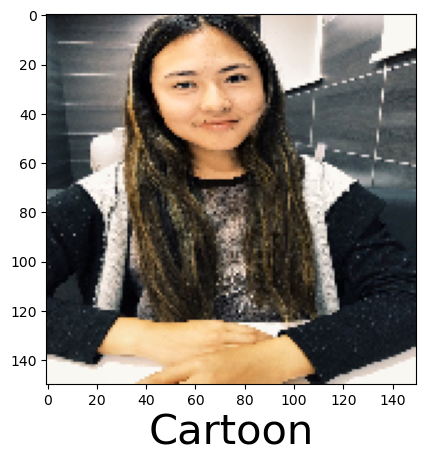

In [36]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/real/15708024981269913.jpg")

1/1 [==============================] - 0s 16ms/step
[[0.]]


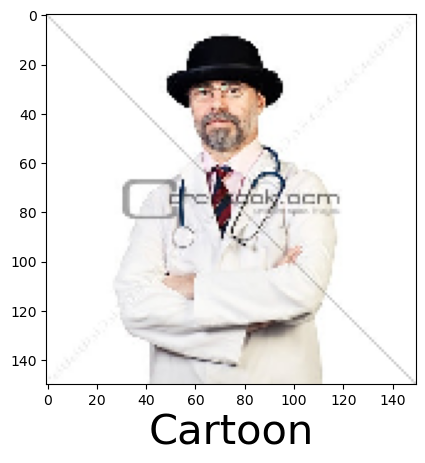

In [26]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/1.jpg")

1/1 [==============================] - 0s 19ms/step
[[0.]]


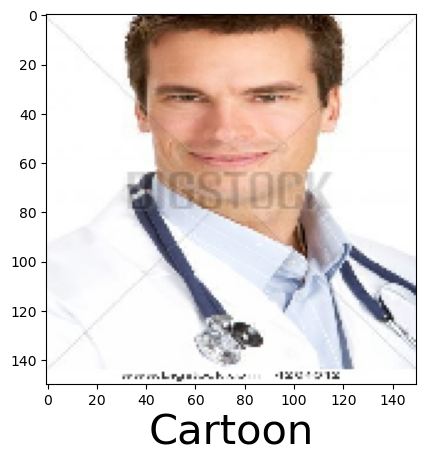

In [27]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/2.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


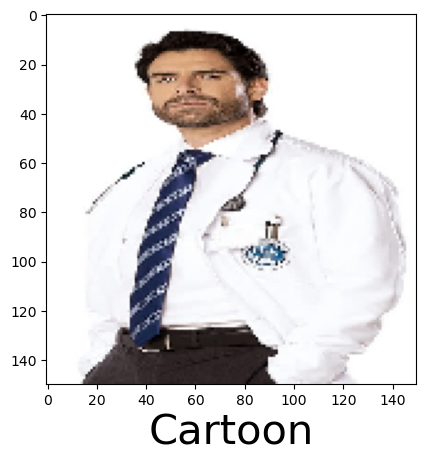

In [28]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/3.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


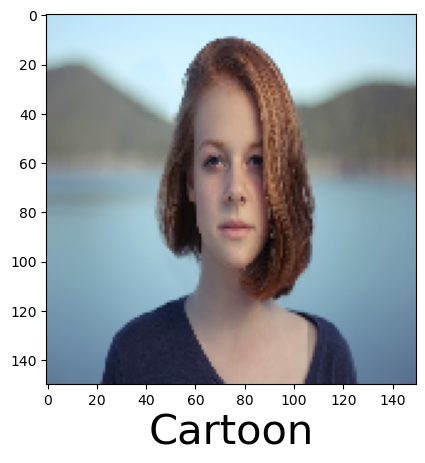

In [29]:
predictImage("C:/Users/User/FYP/photo-1438761681033-6461ffad8d80.jpeg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


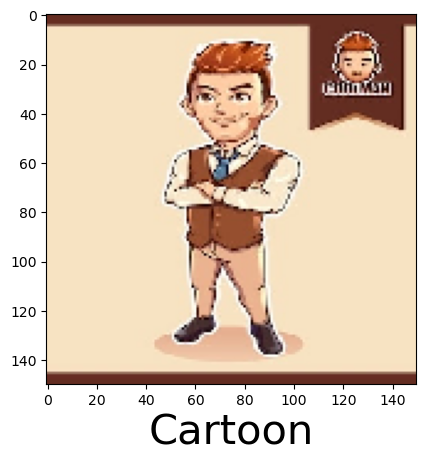

In [30]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1502.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


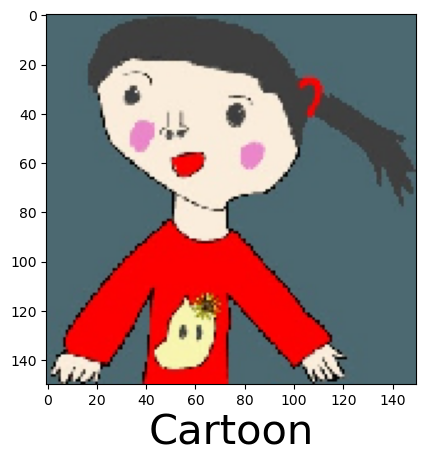

In [31]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1503.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


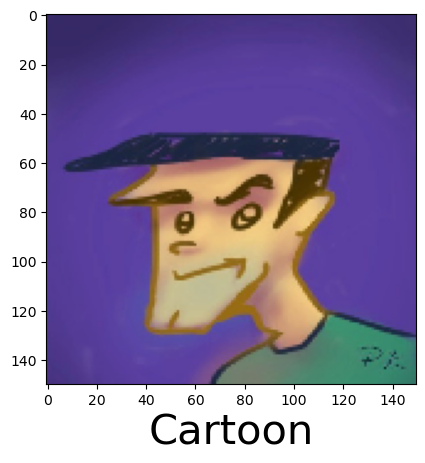

In [32]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1504.jpg")